Cg = (Xg, Yg) = (6, 7) #GeoFi的座標

Ca = (Xa, Ya) = (10, 5) #AirFi的座標

Q = 5 --> (Rg, Ra) = (4,3), (3,3), (9,3), (8,3), (3,2)

算出5個hubs的範圍 (圓面積)

工程師座標 N = 11


判斷 N個工程師座標有沒有在5個圓範圍內


In [60]:
import matplotlib.pyplot as plt 
import numpy as np 

In [92]:
def get_intercetions(x0, y0, r0, x1, y1, r1):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)

    # non intersecting
    if d > r0 + r1 :
        return None
    # One circle within other
    if d < abs(r0-r1):
        return None
    # coincident circles
    if d == 0 and r0 == r1:
        return None
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h=math.sqrt(r0**2-a**2)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=x2+h*(y1-y0)/d     
        y3=y2-h*(x1-x0)/d 

        x4=x2-h*(y1-y0)/d
        y4=y2+h*(x1-x0)/d

        return (x3, y3, x4, y4)

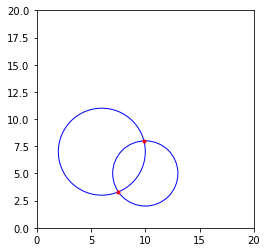

In [93]:
# intersection circles
x0, y0 = 6, 7
r0 = 4
x1, y1 = 10, 5
r1 = 3

# intersecting with (x1, y1) but not with (x0, y0)

circle1 = plt.Circle((x0, y0), r0, color='b', fill=False)
circle2 = plt.Circle((x1, y1), r1, color='b', fill=False)

fig, ax = plt.subplots() 
ax.set_xlim((0, 20))
ax.set_ylim((0, 20))
ax.add_artist(circle1)
ax.add_artist(circle2)

intersections = get_intercetions(x0, y0, r0, x1, y1, r1)
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')

intersections = get_intercetions(x0, y0, r0, x2, y2, r2)
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')

intersections = get_intercetions(x1, y1, r1, x2, y2, r2)
if intersections is not None:
    i_x3, i_y3, i_x4, i_y4 = intersections 
    plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')

plt.gca().set_aspect('equal', adjustable='box')


In [101]:
d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
x0, y0 = 6, 7
r0 = 4
x1, y1 = 10, 5
r1 = 3


a=(r0**2-r1**2+d**2)/(2*d)
h=math.sqrt(r0**2-a**2)
x2=x0+a*(x1-x0)/d   
y2=y0+a*(y1-y0)/d   
x3=x2+h*(y1-y0)/d     
y3=y2-h*(x1-x0)/d 

x4=x2-h*(y1-y0)/d
y4=y2+h*(x1-x0)/d

print((x3, y3), (x4, y4))

(7.526330540569449, 3.3026610811389006) (9.873669459430548, 7.9973389188611)


In [110]:
#N = int(input()) #輸入工程師人數
#隨機產生N個座標
#if (x, y) in (x3, y3, x4, y4) or not in zip(circle1, circle2)
    #return N的個數
    
circle1 = plt.Circle((x0, y0), r0, color='b', fill=False)

import random
from random import randrange

N = 11
coords = [(randrange(20) , randrange(20) ) for _ in range(N)]
print(coords)

for c in coords:
    if c > (x3, y3) and c < (x4, y4):
        N += 1
        print(N-1)

[(19, 3), (13, 9), (17, 13), (18, 0), (11, 1), (10, 8), (15, 11), (14, 6), (10, 14), (17, 14), (5, 3)]
